In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=20)

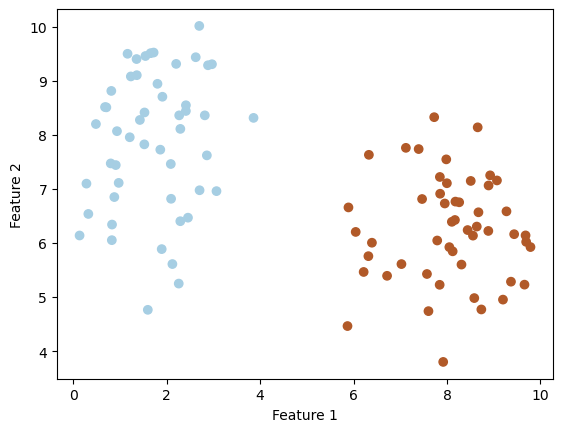

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [5]:
svm_linear_model = SVC(kernel="linear", C=9)
svm_linear_model.fit(X_train, y_train)

SVC(C=9, kernel='linear')

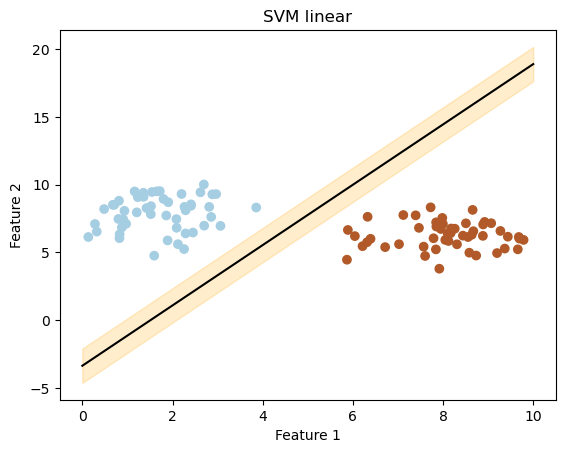

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
w = svm_linear_model.coef_[0]
b = svm_linear_model.intercept_[0]
x1 = np.linspace(0,10,100)
x2 = (-w[0] * x1 -b) / w[1]
plt.plot(x1,x2,"k-")

margin = 1 / np.sqrt(np.sum(svm_linear_model.coef_ ** 2))
plt.fill_between(x1, x2 - margin, x2 + margin, alpha=0.2, color="orange")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.title("SVM linear")
plt.show()

In [8]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=4)

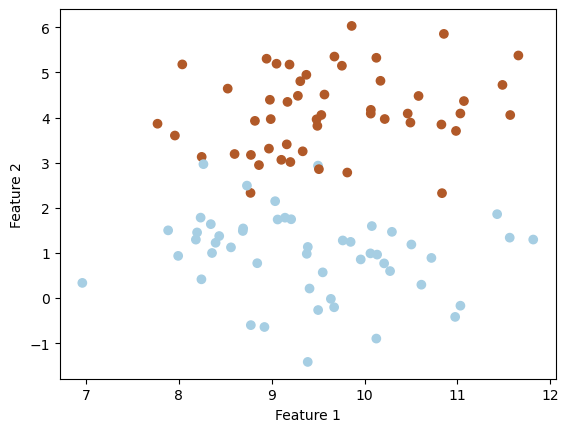

In [9]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [11]:
svm_poly_model = SVC(kernel="poly", degree=3, C=1)
svm_poly_model.fit(X_train, y_train)
y_pred_poly = svm_poly_model.predict(X_test)

In [12]:
print(accuracy_score(y_test, y_pred_poly))

0.9


In [13]:
print(classification_report(y_test, y_pred_poly))
print("-------------")
print(confusion_matrix(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.78      1.00      0.88         7

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20

-------------
[[11  2]
 [ 0  7]]


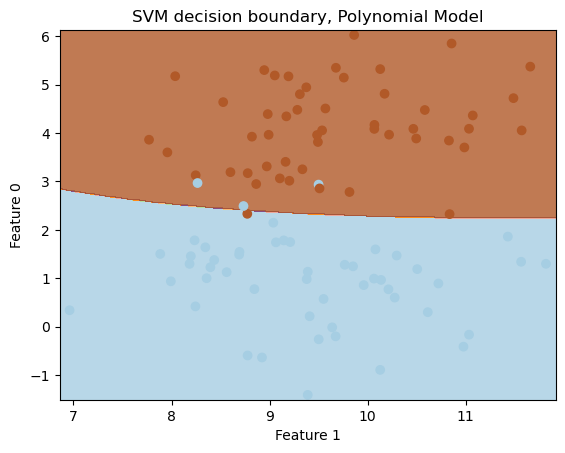

In [14]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svm_poly_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 0")
plt.title("SVM decision boundary, Polynomial Model")
plt.show()

RBF

In [42]:
X,y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=44)

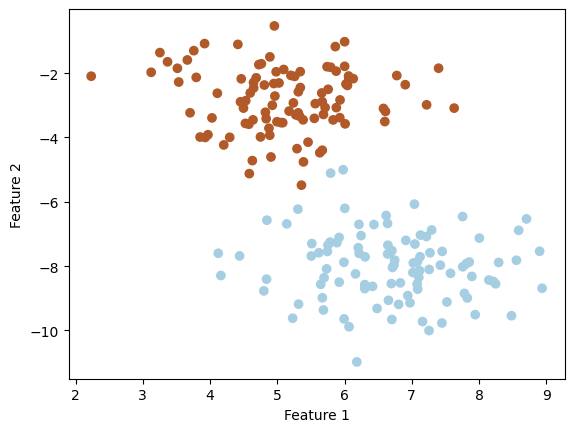

In [44]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
svm_rbf_model = SVC(kernel="rbf", gamma=0.7, C=10)
svm_rbf_model.fit(X_train, y_train)

SVC(C=10, gamma=0.7)

In [71]:
y_pred = svm_rbf_model.predict(X_test)


In [72]:
print(accuracy_score(y_test, y_pred))
print("---------------------")
print(classification_report(y_test, y_pred))
print("---------------------")
print(confusion_matrix(y_test, y_pred))

0.975
---------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.94      0.97        18

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

---------------------
[[22  0]
 [ 1 17]]


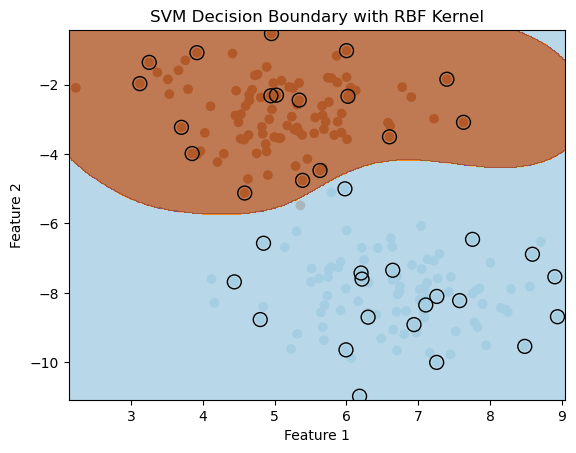

In [73]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svm_rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(svm_rbf_model.support_vectors_[:, 0], svm_rbf_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with RBF Kernel")
plt.show()